In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/quora-questionds/train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.duplicated().sum()

0

In [8]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255024
1    149263
Name: count, dtype: int64


In [9]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

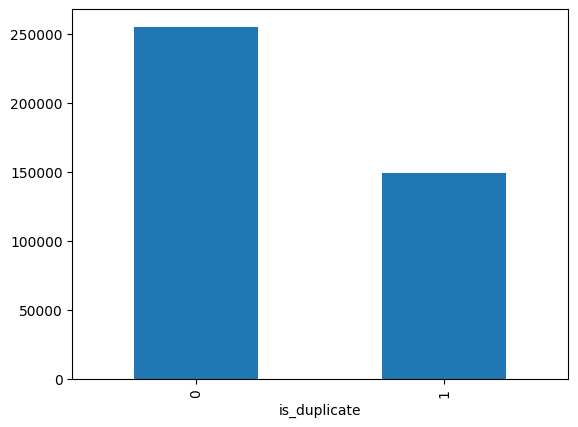

In [10]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of unique questions",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of questions getting repeated",x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


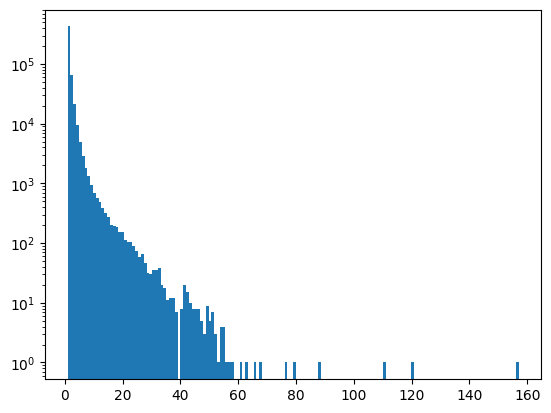

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [13]:
df = df.drop(columns=['id','qid1','qid2'])

In [14]:
y = df['is_duplicate']

In [15]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, Length: 404287, dtype: int64


In [16]:
df = df[['question1','question2']]

## Implementing Bag of words

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

In [18]:
question = []
for row in range(0,len(df.index)):
    question.append(' '.join(str(x) for x in df.iloc[row,0:2]))


In [19]:
question[0]

'What is the step by step guide to invest in share market in india? What is the step by step guide to invest in share market?'

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [21]:
# preprocessing on question
corpus = []
for i in range(len(question)):
    ques = re.sub('[^a-zA-Z]',' ',question[i])
    ques = ques.lower()
    ques = ques.split()
#     ques = [ps.stem(word) for word in ques if word not in set(stopwords.words('english'))]
    ques = ' '.join(ques)
    corpus.append(ques)

In [22]:
corpus[0]

'what is the step by step guide to invest in share market in india what is the step by step guide to invest in share market'

In [23]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [33]:
tfidf = TfidfVectorizer(max_features=2500)
X=tfidf.fit_transform(corpus).toarray()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='entropy', n_jobs = -1)
rf = rf.fit(X_train,y_train)

In [36]:
y_pred = rf.predict(X_test)


## Bag of words accuracy

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f"%accuracy)
print(confusion_m)

Accuracy: 0.813
[[46279  4859]
 [10248 19472]]


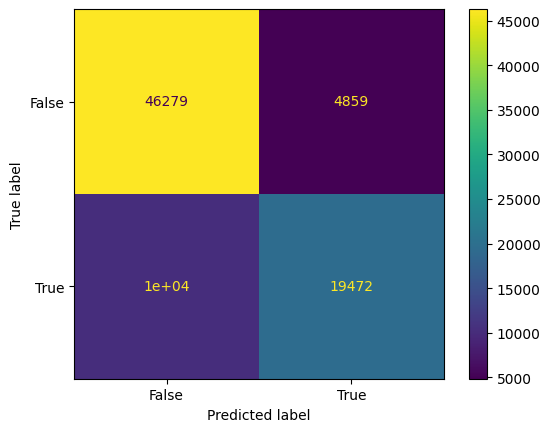

In [28]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])

cm_display.plot()
plt.show()

## tfidf accuracy

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f"%accuracy)
print(confusion_m)

Accuracy: 0.803
[[46992  4146]
 [11801 17919]]


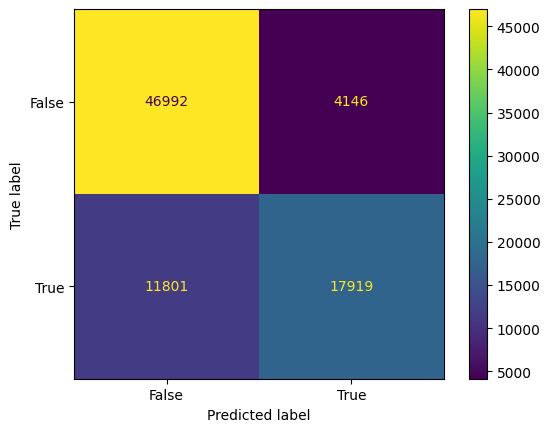

In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])

cm_display.plot()
plt.show()